In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from ast import literal_eval
# %matplotlib inline
plt.style.use("ggplot")

In [2]:
credit= pd.read_csv('tmdb_5000_credits.csv')
movies= pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credit = credit.drop('title', axis=1)
final_df = pd.merge(left=movies, right=credit, how='left', left_on='id', right_on='movie_id')
final_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

## Demographic Filtering -

In [6]:
popular_product= final_df.sort_values('vote_average',ascending=False)
popular_product = popular_product[['title','vote_average','vote_count']]
#popular_product.head(20)

In [7]:
c = popular_product['vote_average'].mean()
m = popular_product['vote_count'].quantile( q=0.9)

In [8]:
new_popular_product = popular_product.copy().loc[popular_product['vote_count']>m]

In [9]:
def calculate_weighted_average(x,c=c,m=m):
    v=x['vote_count'];   
    r=x['vote_average'];
    score= ((v*r)/(v+m)+(m*c)/(v+m))
    return score;

In [10]:
new_popular_product['score'] = new_popular_product.apply(calculate_weighted_average,axis=1)

In [11]:
new_popular_product = new_popular_product.sort_values('score',ascending=False)
new_popular_product

,title,vote_average,vote_count,score
1881,The Shawshank Redemption,8.5,8205,8.059258
662,Fight Club,8.3,9413,7.939256
65,The Dark Knight,8.2,12002,7.920020
3232,Pulp Fiction,8.3,8428,7.904645
96,Inception,8.1,13752,7.863239
...,...,...,...,...
41,Green Lantern,5.1,2487,5.521697
337,A Good Day to Die Hard,5.2,3493,5.507643
193,After Earth,5.0,2532,5.459420
91,Independence Day: Resurgence,4.9,2491,5.406234


<BarContainer object of 10 artists>

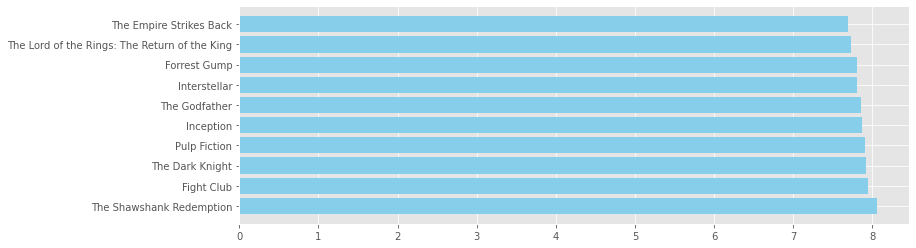

In [12]:
plt.figure(figsize=(12,4))
plt.barh(new_popular_product['title'].head(10),new_popular_product['score'].head(10), align='center',
        color='skyblue')

## Content based filtering 

### Description based recommender

In [13]:
final_df['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [14]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [15]:
final_df['overview'] = final_df['overview'].fillna('')

In [16]:
tfidf_matrix=tfidf.fit_transform(final_df['overview'])

In [17]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [18]:
cosine_similarity  = linear_kernel(tfidf_matrix, tfidf_matrix)

In [19]:
cosine_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [20]:
indicies = pd.Series(final_df.index,index=final_df['title'].str.lower().str.replace(" ", "")).drop_duplicates(keep='last')

In [21]:
def get_movie_recomendation_content_base(title, cosine_similarity=cosine_similarity,indicies=indicies):
    idx = indicies[title.lower().replace(" ", "")]
    cosine_similarity[idx]
    cosine_similarity_items = list(enumerate(cosine_similarity[idx]))
    cosine_similarity_items = sorted(cosine_similarity_items, key = lambda x : x[1], reverse=True)
    cosine_similarity_items = cosine_similarity_items[1:11]
    similar_items_index = [i[0] for i in cosine_similarity_items]
    return final_df['title'].iloc[similar_items_index]


In [22]:
get_movie_recomendation_content_base('The Dark Knight')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title, dtype: object

### Cast, Crew, Keywords, Genres based recomendarion

In [23]:
features = ['cast','crew','keywords','genres','production_companies']
for feature in features:
    final_df[feature] = final_df[feature].apply(literal_eval)

In [24]:
final_df['production_companies'][0]

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [25]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [26]:
def get_list(x):
    if isinstance(x,list):
        list_item = [i['name'] for i in x]
        print(list_item)
        if len(list_item)<3:
            return list_item;
        return list_item[0:3]
    return []    

In [27]:
final_df['director'] = final_df['crew'].apply(get_director)

In [28]:
features = ['cast','keywords','genres','production_companies']
for feature in features:
    final_df[feature] = final_df[feature].apply(get_list)

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Chris Mala', 'Taylor Kibby', 'Jodie Landau', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan Meister', 'Gerry Blair', 'Matthew Chamberlain', 'Paul Yates', 'Wray Wilson', 'James Gaylyn', 'Melvin Leno Clark III', 'Carvon Futrell', 'Brandon Jelkes', 'Micah Moch', 'Hanniyah Muhammad', 'Christopher Nolen', 'Ch

['Robin Williams', 'Sally Field', 'Pierce Brosnan', 'Harvey Fierstein', 'Polly Holliday', 'Lisa Jakub', 'Matthew Lawrence', 'Mara Wilson', 'Robert Prosky', 'Anne Haney', 'Scott Capurro', 'Sydney Walker', 'Martin Mull', 'Terence McGovern', 'Karen Kahn', 'Eva Gholson', 'James Cunningham', 'Ralph Peduto', 'Scott Beach', 'Juliette Marshall', 'Drew Letchworth', 'Jessica Myerson', 'Sharon Lockwood', 'Jim Cullen']
['Dustin Hoffman', 'Tom Cruise', 'Valeria Golino', 'Gerald R. Molen', 'Jack Murdock', 'Michael D. Roberts', 'Ralph Seymour', 'Lucinda Jenney', 'Bonnie Hunt', 'Kim Robillard', 'Beth Grant', 'Dolan Dougherty', 'Marshall Dougherty', 'Patrick Dougherty', 'Peter Dougherty', 'Andrew Dougherty', 'Loretta Wendt Jolivette', 'Donald E. Jones', 'Bryon P. Caunar', 'Donna J. Dickson', 'Ralph Tabakin', 'Ray Baker', 'Jake Hoffman', 'Royce D. Applegate', 'Anna Mathias', 'Archie Hahn', 'Luisa Leschin', 'Ira Miller', 'Chris Mulkey', 'Julie Payne', 'Reni Santoni', 'Ruth Silveira', 'Jonathan Stark', 'L

['Anne-Marie Loop', 'Lambert Wilson', 'Pauline Brunner', 'Patrice Melennec', 'Brigitte Virtudes', 'Léonard Louf', 'Dominique Maurin', 'Yann Lemadic', 'Féodor Atkine', 'Vincent Grass', 'Patrice Dozier', 'Jacques Ciron', 'Garance Pauwels', 'Romy Beckman', 'Delphina Belle', 'Susanne Blakeslee', 'Ashley Boettcher', 'Forest Whitaker', 'Mackenzie Foy', 'Lauren Bacall', 'Paul Giamatti', 'William H. Macy', 'Megan Mullally', 'Nick Offerman', 'Jeffrey Wright']
['Eddie Murphy', 'Charles Dance', 'Charlotte Lewis', 'Victor Wong', 'Peter Kwong', 'Jasmine Reate', 'James Hong', "Randall 'Tex' Cobb"]
['Michael Ealy', 'Jerry Ferrara', 'Meagan Good', 'Regina Hall', 'Kevin Hart', 'Taraji P. Henson', 'Terrence Jenkins', 'Romany Malco', 'Gabrielle Union', 'Jenifer Lewis', 'Gary Owen', 'La La Anthony', 'Chris Brown', 'Wendy Williams', 'Sherri Shepherd', 'Caleel Harris', 'Arielle Kebbel', 'Steve Harvey', 'Tika Sumpter']
['Ice Cube', 'Anthony Anderson', 'Cedric the Entertainer', 'Sean Patrick Thomas', 'Eve', '

['Viggo Mortensen', 'Reda Kateb', 'Djemel Barek', 'Vincent Martin', 'Nicolas Giraud', 'Jean-Jérôme Esposito', 'Yann Goven', 'Antoine Régent', 'Sonia Amori', 'Antoine Laurent', 'Ángela Molina']
['Aaron Eckhart', 'Maria Bello', 'Cameron Bright', 'Adam Brody', 'Sam Elliott', 'Katie Holmes', 'Rob Lowe', 'William H. Macy', 'Robert Duvall', 'David Koechner', 'J.K. Simmons', 'Kim Dickens', 'Connie Ray', 'Joan Lunden', 'Mary Jo Smith', 'Todd Louiso', 'Jeff Witzke', 'Marianne Muellerleile', 'Jordan Garrett', 'Courtney Taylor Burness', 'Daniel Travis', 'Richard Speight Jr.', 'Renée Graham', 'Timothy Dowling', 'Dennis Miller', 'Terry James', 'Marc Scizak', 'Rachel Thorp', 'Aaron Lustig', 'Melora Hardin', 'Brian Palermo', 'Michael Mantell', 'Spencer Garrett', 'Earl Billings', 'Catherine Reitman', 'Sean Patrick Murphy', 'David O. Sacks', "Nancy O'Dell", 'Roy Jenkins', 'Bruce French', 'Christopher Buckley', 'Dana E. Glauberman', 'Eva La Dare', 'Robert Malina', 'Aloma Wright']
['Lauren German', 'Bijo

['Scott Eastwood', 'Cheryl Ladd', 'Patrick Lyster', 'Rachel Hendrix ', 'Scott Mortensen', 'Nikolai Mynhardt']
['Paul Scofield', 'Wendy Hiller', 'Leo McKern', 'Robert Shaw', 'Orson Welles', 'Susannah York', 'Nigel Davenport', 'John Hurt', 'Corin Redgrave', 'Colin Blakely', 'Cyril Luckham', 'Jack Gwillim', 'Thomas Heathcote', 'Vanessa Redgrave', 'Yootha Joyce', 'Anthony Nicholls', 'Eira Heath', 'Molly Urquhart', 'Paul Hardwick', 'Michael Latimer', 'Philip Brack', 'Martin Boddey', 'Matt Zimmerman', 'Eric Mason', 'John Nettleton']
['Faye Dunaway', 'William Holden', 'Peter Finch', 'Robert Duvall', 'Wesley Addy', 'Ned Beatty', 'Beatrice Straight', 'Jordan Charney', 'William Prince', 'Arthur Burghardt', 'Conchata Ferrell', 'Jerome Dempsey', 'Ed Crowley', 'Kathy Cronkite', 'Marlene Warfield', 'Darryl Hickman', 'Ken Kercheval', 'Ted Sorel', 'Lane Smith', 'Cindy Grover', 'Michael Lombard', 'Lance Henriksen', 'Roy Poole']
['Vivien Leigh', 'Clark Gable', 'Olivia de Havilland', 'Thomas Mitchell', '

['secret agent', 'bakery', 'falling in love', 'father daughter relationship', 'duringcreditsstinger', 'first date', 'minions', '3d']
['spacecraft', 'patriotism', 'countdown', 'independence', 'invasion', 'war', 'ufo', 'extraterrestrial', 'spaceship', 'alien', 'battle']
['exotic island', 'dna', 'paleontology', 'tyrannosaurus rex', 'velociraptor', 'san diego', 'dinosaur', 'jurassic park', 'animal horror']
['lion', 'hippopotamus', 'giraffe', 'penguin', 'zebra']
['police state', 'hippie', 'rebel', 'miracle', 'future', 'dystopia', 'chaos', 'aging', 'childlessness', 'faith', 'survival', 'birth', 'dying']
['mutant', 'marvel comic', 'superhero', 'based on comic book', 'superhuman']
['assassin', 'loss of father', 'secret society', 'mission of murder', 'revenge']
['san francisco', 'fbi', 'gas attack', 'alcatraz', 'hostage situation', 'fbi agent']
['mammoth', 'sloth', 'ice age', 'barrier ice', 'ice melting', 'iceberg', 'flooding', 'adventure', 'lovers', 'deluge', 'saber-toothed tiger']
['deja vu',

['bomb', 'identity', 'fantasy', 'bomber', 'suspicion', 'time travel', 'investigation', 'surrealism', 'soldier', 'helicopter pilot']
['rugby', 'stranded', 'survival', 'plane wreck', 'airplane crash', 'freezing', 'disaster movie']
['suicide', 'based on novel', 'hotel room', 'obsession', 'sadomasochism', 'psychological thriller', 'killer', 'family', 'numbers']
['train', 'cartographer']
['submarine', 'california', 'world war ii', 'war ship', 'pearl harbor', 'satire', 'los angeles', 'anarchic comedy']
['horse race', 'horse', 'kentucky', 'sport', 'based on true story', 'family relationships', 'father daughter relationship']
['robbery', 'double life', 'dual identity', 'small town', 'indiana', 'distrust', 'fight', 'self-defense', 'marriage', 'family relationships', 'mistaken identity', 'diner', 'lawyer', 'mobster', 'violence', 'attempted robbery']
['martial arts', 'war on drugs', 'kidnapping', 'bodyguard', 'baby-snatching']
['gunslinger', 'revenge', 'prairie', 'shootout', 'pistol']
['irland', 

['tattoo', 'rock star', 'groupie', 'past', 'family']
['nazis', 'anthology', 'remake', 'twilight zone']
['new love', 'protection money', 'nightclub', 'rausschmeißer', 'revenge', 'hoodlum', 'brawl']
['fbi', 'drug crime', 'violence', 'drug', 'private detective', 'blast']
['competition', 'coma', 'infidelity', 'obsession', 'bathing', 'high school', 'femme fatale', 'athlete', 'hospital', 'swimmer', 'swimming', 'troubled teen']
['salesclerk', 'midlife crisis', 'prenzlauer berg', 'vulgar', 'slacker', 'business consultant']
['alcohol', 'regret', 'homophobia', 'radio', 'cheerleader', 'love letter', 'college', 'graduation', 'groupie', 'costume', 'nerd', 'high school', 'party', 'friends', 'dating', 'break-up', 'rock band', 'pop music', 'american football player', 'infatuation', 'washed up star', 'unlikely friendship', 'social outcast', 'woman director', 'jocks', 'having fun', 'revenge plot']
['street gang', "children's home", 'coming of age', 'gang', 'juvenile delinquent', 'based on young adult no

[]
['hacker', 'mathematician', 'helix', 'headache', 'chaos theory', 'migraine', 'mathematics', 'insanity', 'genius']
['woman director']
['hidden camera', 'biography', 'reality show', 'mockumentary']
['monster', 'crab', 'actress']
['experiment', 'health', 'junk food', 'food industry', 'fast food', "mcdonald's restaurant"]
[]
['family', 'mumblecore', 'christmas']
['transplantation', 'experiment', 'mutant', 'brain', 'fiancé', 'surgeon', 'strip club', 'stripper', 'car crash', 'laboratory', 'independent film', 'gore', 'disembodied head', 'mad doctor', 'b movie', 'decapitation', 'severed head', 'car accident', 'violence', 'transplant', 'arm ripped off', 'surgery']
['gay', 'lgbt']
['marriage proposal', 'relationship', 'filmmaking', 'film editing']
['pregnancy', 'declared dead', 'returned alive']
['love', 'independent film', 'best friend', 'true love', 'irish catholic']
[]
[]
['sister sister relationship', 'male female relationship', 'mother daughter relationship', 'youtube', 'woman director']

['Action']
['Action', 'Thriller']
['Comedy']
['Comedy', 'Drama']
['Music', 'Comedy', 'Drama']
['Drama', 'History']
['Fantasy', 'Horror', 'Action']
['Comedy']
['Animation', 'Science Fiction']
['Comedy', 'Drama']
['Mystery', 'Thriller']
['Comedy']
['Adventure', 'Action', 'Thriller']
['Comedy', 'Romance']
['Thriller', 'Science Fiction', 'Action', 'Crime']
['Comedy']
['Romance']
['Comedy', 'Family', 'Fantasy']
['Comedy']
['Action', 'Crime']
['Action', 'Adventure', 'Comedy']
['Thriller', 'Horror']
['Family', 'Comedy']
['Drama', 'Romance']
['Science Fiction', 'Drama', 'Thriller']
['Adventure']
['Action', 'Drama', 'Thriller', 'Crime']
['Drama', 'Crime', 'Thriller']
['Horror', 'Thriller']
['Documentary']
['Comedy', 'Drama', 'Family', 'Fantasy', 'Romance']
['Drama', 'Comedy']
['Action', 'Comedy', 'Family']
['Adventure', 'Comedy', 'Family', 'Fantasy']
['Action', 'Horror', 'Science Fiction']
['Comedy', 'Drama']
['Romance', 'Horror', 'Comedy', 'Thriller']
['Drama']
['Comedy', 'Romance', 'Drama']
[

['Drama', 'Romance']
['Adventure', 'Comedy']
['Animation', 'Science Fiction']
['Thriller', 'Mystery', 'Science Fiction']
['Drama', 'History', 'War']
['Drama']
['Thriller', 'Crime', 'Mystery']
['Action', 'Adventure', 'Animation', 'Fantasy', 'Science Fiction']
['Thriller', 'Action', 'Drama']
['Horror', 'Comedy']
['Drama', 'Music', 'Romance']
['Drama', 'Music', 'Romance']
['Comedy']
['Science Fiction']
['Adventure', 'Family']
['Comedy']
['Drama']
['Romance', 'Comedy']
['Drama', 'Romance']
['Horror', 'Drama', 'Thriller']
['Action', 'Drama', 'History']
['Drama', 'Romance']
['Drama', 'Romance']
['Action', 'Adventure', 'Drama']
['Adventure', 'Drama', 'Thriller']
['Drama', 'Foreign', 'Romance']
['Drama', 'History', 'War']
['Romance']
['Drama', 'History', 'Romance']
['Horror', 'Comedy', 'Music', 'Science Fiction']
['Adventure', 'Drama', 'Action']
['Thriller', 'Crime']
['Adventure', 'Comedy', 'Family']
['Crime', 'Drama', 'Thriller']
['Comedy', 'Horror']
['Drama', 'Family', 'Music', 'Romance']
['

['Drama', 'Science Fiction']
['Action', 'Drama', 'Romance']
['Drama']
['Comedy', 'Drama', 'Romance']
['Drama', 'Music', 'Romance']
['Drama']
['Documentary']
['Thriller', 'Drama', 'Horror']
['Action', 'Drama']
['Animation', 'Family', 'Comedy', 'TV Movie']
['Documentary']
['Documentary']
['Documentary']
['Documentary', 'History']
[]
['Science Fiction', 'Drama', 'Mystery']
[]
['Drama', 'Comedy']
['Comedy']
['Drama', 'Romance']
['Drama']
['Comedy']
['Drama']
['Horror', 'Thriller']
['Drama', 'Fantasy', 'Horror', 'Science Fiction']
['Comedy']
['Comedy', 'Drama']
['Action', 'Drama']
['Comedy', 'Horror', 'Science Fiction']
['Family']
['Drama', 'Comedy', 'Crime']
['Documentary']
['Thriller']
['Crime', 'Mystery', 'Thriller']
['Thriller', 'Action', 'Drama', 'Science Fiction']
['Crime', 'Horror']
['Documentary', 'Music']
['Documentary']
['Mystery', 'Drama', 'Thriller']
['Comedy', 'Romance']
['Romance', 'Comedy']
['Science Fiction']
['Documentary', 'Comedy', 'Drama']
['Comedy']
['Comedy', 'Drama']


['Mike Zoss Productions', 'The Jacobson Company', 'Touchstone Pictures']
['Dune Entertainment', 'Firm Films', 'Collision Entertainment', 'Abandon Entertainment', 'Foxtor Productions', 'Depth Entertainment']
['Regency Enterprises', 'Strike Entertainment', 'New Regency Pictures']
['Escape Artists', 'CBS Films']
['Alcon Entertainment', 'Wild Ocean Films', '2S Films']
['Twentieth Century Fox Film Corporation', 'Regency Enterprises', 'Epsilon Motion Pictures', 'New Regency Pictures', 'Runteldat Entertainment', 'Firm, The']
['Paramount Pictures']
['Universal Pictures', 'Capcom']
['Bac Films', 'Canal+Polska', 'Heritage Films', 'Studio Babelsberg', 'Agencja Produkcji Filmowej', 'Beverly Detroit', 'FilmFernsehFonds Bayern', 'Filmboard Berlin-Brandenburg (FBB)', 'Mainstream S.A.', 'R.P. Productions', 'StudioCanal', 'Filmförderungsanstalt (FFA)', 'Canal+', 'Interscope Communications', 'Telewizja Polska (TVP)', 'Runteam']
['New Line Cinema', 'Sound for Film', 'Temple Hill Entertainment']
['Village

['Beijing New Picture Film Co. Ltd.', 'Film Partner International']
['Miramax Films', 'Pandora Cinema']
['Media Asia Films', 'China Film Group Corporation (CFGC)', 'Stellar Megamedia', 'Jiangsu Broadcasting System', 'Chuan Production Film Studio']
[]
['Tokyo Broadcasting System (TBS)', 'Mainichi Broadcasting System (MBS)', 'Sedic', 'Tokyo FM Broadcasting Co.', 'Hokkaido Broadcasting Co.', 'Sedic International', 'Shogakukan', 'Hakuhodo DY Media Partners', 'Abe Shuji', 'Chubu-nippon Broadcasting Company (CBC)', 'RKB Mainichi Broadcasting Corporation', 'Robot Communications', 'Tohokushinsha Film']
['Midnight Sun Pictures', 'Dispictures', 'Georgia International Films', 'Rex Media']
['Dan Films', 'UK Film Council', 'Pictures in Paradise', 'Pacific Film and Television Commission', 'Icon Entertainment International', 'Framestore', 'Triangle Films']
[]
['TriStar Pictures', 'Screen Gems', 'Roth Films']
['Columbia Pictures Corporation', 'Screen Gems', 'SKA Films']
[]
['Paramount Pictures']
['Tok

In [29]:
final_df[['title', 'cast', 'director', 'keywords', 'genres','production_companies']].head(3)

,title,cast,director,keywords,genres,production_companies
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]","[Ingenious Film Partners, Twentieth Century Fo..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]"


In [30]:
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x,str):
            return str.lower(x.replace(" ", ""))
        else:
            return '';

In [31]:
features = ['cast','director','keywords','genres','production_companies']
for feature in features:
    final_df[feature] = final_df[feature].apply(clean_data)

In [32]:
final_df[['title', 'cast', 'director', 'keywords', 'genres','production_companies']].head(3)

,title,cast,director,keywords,genres,production_companies
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]","[ingeniousfilmpartners, twentiethcenturyfoxfil..."
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]","[waltdisneypictures, jerrybruckheimerfilms, se..."
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]","[columbiapictures, danjaq, b24]"


In [33]:
def create_soup(x):
    return ' '.join(x['cast'])+' '+' '.join(x['director'])+' '+' '.join(x['director'])+' '+' '.join(x['keywords'])+' '+' '.join(x['genres'])+' '+' '.join(x['production_companies'])
final_df['soup'] = final_df.apply(create_soup, axis=1)

In [34]:
count_vector = CountVectorizer(stop_words='english');
count_vector_array = count_vector.fit_transform(final_df['soup'])
count_vector_array
#

<4803x12818 sparse matrix of type '<class 'numpy.int64'>'
	with 49156 stored elements in Compressed Sparse Row format>

In [35]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_vector_array, count_vector_array)

In [36]:
#cosine_sim2

In [37]:
final_df = final_df.reset_index()
indicies = pd.Series(final_df.index,index=final_df['title'].str.lower().str.replace(" ", ""))

In [38]:
get_movie_recomendation_content_base('The Godfather',cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
1170     The Talented Mr. Ripley
2649           The Son of No One
4124          This Thing of Ours
4564    Straight Out of Brooklyn
1151             Double Jeopardy
1828            The Untouchables
1850                    Scarface
2216             We're No Angels
Name: title, dtype: object

## Collborative Filtering

In [39]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate

In [40]:
reader = Reader()
rating= pd.read_csv('ratings_small.csv')
rating.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [41]:
data =  Dataset.load_from_df(rating[['userId','movieId','rating']],reader)
# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8934  0.8936  0.8872  0.8908  0.8891  0.8884  0.8843  0.8930  0.8969  0.8976  0.8914  0.0040  
MAE (testset)     0.6891  0.6867  0.6804  0.6841  0.6828  0.6823  0.6812  0.6921  0.6892  0.6919  0.6860  0.0042  
Fit time          0.92    0.81    0.86    0.79    1.05    0.99    0.90    1.11    0.86    0.95    0.92    0.10    
Test time         0.06    0.06    0.06    0.05    0.06    0.07    0.06    0.12    0.06    0.07    0.07    0.02    


{'test_rmse': array([0.89342553, 0.89358658, 0.88717348, 0.89080953, 0.88906493,
        0.88843821, 0.88433686, 0.89302486, 0.89688325, 0.89759258]),
 'test_mae': array([0.6891128 , 0.68666866, 0.68038081, 0.68408102, 0.68284073,
        0.68225891, 0.68120456, 0.69213145, 0.68917774, 0.69187004]),
 'fit_time': (0.9227361679077148,
  0.8056130409240723,
  0.8588840961456299,
  0.7922492027282715,
  1.0478551387786865,
  0.9930708408355713,
  0.8999011516571045,
  1.1115100383758545,
  0.8630399703979492,
  0.9496440887451172),
 'test_time': (0.05788588523864746,
  0.05552315711975098,
  0.060086965560913086,
  0.054900169372558594,
  0.05907106399536133,
  0.06755614280700684,
  0.0581057071685791,
  0.11654400825500488,
  0.056756019592285156,
  0.06673502922058105)}

In [42]:
train_data = data.build_full_trainset()
svd.fit(train_data)

In [43]:
rating[(rating['userId']==1) | (rating['userId']==2)]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
91,2,592,5.0,835355395
92,2,593,3.0,835355511
93,2,616,3.0,835355932
94,2,661,4.0,835356141


In [44]:
svd.predict(1,31,3)

Prediction(uid=1, iid=31, r_ui=3, est=2.506962271111541, details={'was_impossible': False})

## Hybrid Recommender

In [45]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [46]:
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
final_df['id'] = final_df['id'].astype('int')
smd = final_df[final_df['id'].isin(links_small)]
smd

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,samworthington zoesaldana sigourneyweaver j a ...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,johnnydepp orlandobloom keiraknightley g o r e...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,danielcraig christophwaltz léaseydoux s a m m ...
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,christianbale michaelcaine garyoldman c h r i ...
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,taylorkitsch lynncollins samanthamorton a n d ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,4788,12000,"[horror, comedy, crime]",NaN,692,"[gay, trailerpark, popculture]",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,...,Released,An exercise in poor taste.,Pink Flamingos,6.2,110,692,"[divine, davidlochary, maryvivianpearce]","[{'credit_id': '52fe426bc3a36847f801d203', 'de...",johnwaters,divine davidlochary maryvivianpearce j o h n w...
4790,4790,0,"[drama, foreign]",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,...,Released,NaN,The Circle,6.6,17,13898,"[nargessmamizadeh, maryiampalvinalmani, mojgan...","[{'credit_id': '52fe45b09251416c7505f189', 'de...",jafarpanahi,nargessmamizadeh maryiampalvinalmani mojganfar...
4792,4792,20000,"[crime, horror, mystery]",NaN,36095,"[japan, prostitute, hotel]",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,...,Released,Madness. Terror. Murder.,Cure,7.4,63,36095,"[kojiyakusho, masatohagiwara, tsuyoshiujiki]","[{'credit_id': '52fe45cc9251416c9103eb7b', 'de...",kiyoshikurosawa,kojiyakusho masatohagiwara tsuyoshiujiki k i y...
4796,4796,7000,"[sciencefiction, drama, thriller]",http://www.primermovie.com,14337,"[distrust, garage, identitycrisis]",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,...,Released,What happens if it actually works?,Primer,6.9,658,14337,"[shanecarruth, davidsullivan, caseygooden]","[{'credit_id': '52fe45e79251416c75066791', 'de...",shanecarruth,shanecarruth davidsullivan caseygooden s h a n...


In [47]:
id_map = pd.read_csv('links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')
indices_map = id_map.set_index('id')
id_map['id'] = id_map['id'].astype('int')

In [48]:
def hybrid_recomendation(userId, title):
    idx = indicies[title.lower().replace(" ", "")]
    tmdbId = id_map.loc[title]['id']
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores= list(enumerate(cosine_sim2[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title' ,'tagline','vote_count','vote_average', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)
   

In [49]:
hybrid_recomendation(1,'Avatar')

,title,tagline,vote_count,vote_average,id,est
270,The Martian,Bring Him Home,7268,7.6,286217,3.472138
354,The Girl with the Dragon Tattoo,Evil shall with evil be expelled.,2434,7.2,65754,3.195037
124,Frozen,Only the act of true love will thaw a frozen h...,5295,7.3,109445,3.130267
1061,Love Actually,The ultimate romantic comedy.,1869,7.0,508,2.905564
46,X-Men: Days of Future Past,"To save the future, they must alter the past",6032,7.5,127585,2.841242
1313,The Ninth Gate,Every book has a life of its own.,756,6.3,622,2.785909
301,Cloud Atlas,Everything is Connected,2977,6.6,83542,2.682486
223,The Chronicles of Riddick,All the power in the universe can't change des...,1570,6.3,2789,2.668528
489,Oceans,Explore the depths of our planet's oceans. Ex...,111,7.3,36970,2.660073
666,"I, Frankenstein","In the battle between good and evil, an immort...",687,5.0,100241,2.624632


In [50]:
import pickle5 as pickle

In [51]:
pickle.dump(final_df[['title','id']],open('movie.pkl','wb'))

In [52]:
pickle.dump(cosine_similarity,open('cosine_similarity.pkl','wb'))
pickle.dump(cosine_sim2,open('cosine_sim2.pkl','wb'))

In [53]:
pickle.dump(indicies,open('indicies.pkl','wb'))

In [54]:
final_df[final_df['id']==49538]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,director,soup
101,101,160000000,"[action, sciencefiction, adventure]",http://www.x-menfirstclassmovie.com/,49538,"[cia, mutant, mine]",en,X-Men: First Class,Before Charles Xavier and Erik Lensherr took t...,3.195174,...,Released,Witness the moment that will change our world.,X-Men: First Class,7.1,5181,49538,"[jamesmcavoy, michaelfassbender, jenniferlawre...","[{'credit_id': '538d861cc3a368714300461d', 'de...",matthewvaughn,jamesmcavoy michaelfassbender jenniferlawrence...
